In [37]:
import Utils.DiaSourceTools as DSTools
import Utils.SourcePlotting as SP

import pickle
import lsst.daf.persistence as dafPersist



In [104]:
reload(DSTools)
reload(SP)

<module 'Utils.SourcePlotting' from 'Utils/SourcePlotting.pyc'>

In [8]:
pkl_file = open('mjd_dict.pickle', 'rb')
mjds = pickle.load(pkl_file)

In [126]:

DATADIR="/renoir_data_02/jpreyes/lsst_data/CFHTLS_master/"
butler = dafPersist.Butler(DATADIR+"/output") 

filter = 'r'

In [127]:
cat_ids = butler.queryMetadata("deepDiff_class_diaSrc", format=["ccd","filter", "visit"],dataId={"filter":filter})

In [ ]:

season_catalogs = []
data_refs = []
for c_id in cat_ids:
    #if c_id[0] == 14:
        if  butler.datasetExists("deepDiff_class_diaSrc", {"ccd":c_id[0],"filter":c_id[1], "visit":c_id[2]}):
            data_refs.append({"ccd":c_id[0],"filter":c_id[1], "visit":c_id[2]})
            season_catalogs.append(butler.get("deepDiff_class_diaSrc", {"ccd":c_id[0],"filter":c_id[1], "visit":c_id[2]}))
     

In [ ]:
results = DSTools.multi_match_catalogs(season_catalogs, data_refs)
print len(results)

In [ ]:
light_curves=DSTools.get_light_curves_from_multimatch_results(results)
print len(light_curves)

In [ ]:
t_light_curves = DSTools.threshold_light_curves(light_curves, 10)
print len(t_light_curves)

In [130]:
len(light_curves)

711082

In [118]:
lcs = []
for t_light_curve in t_light_curves:
    lcs.append(DSTools.build_lightcurve(t_light_curve))

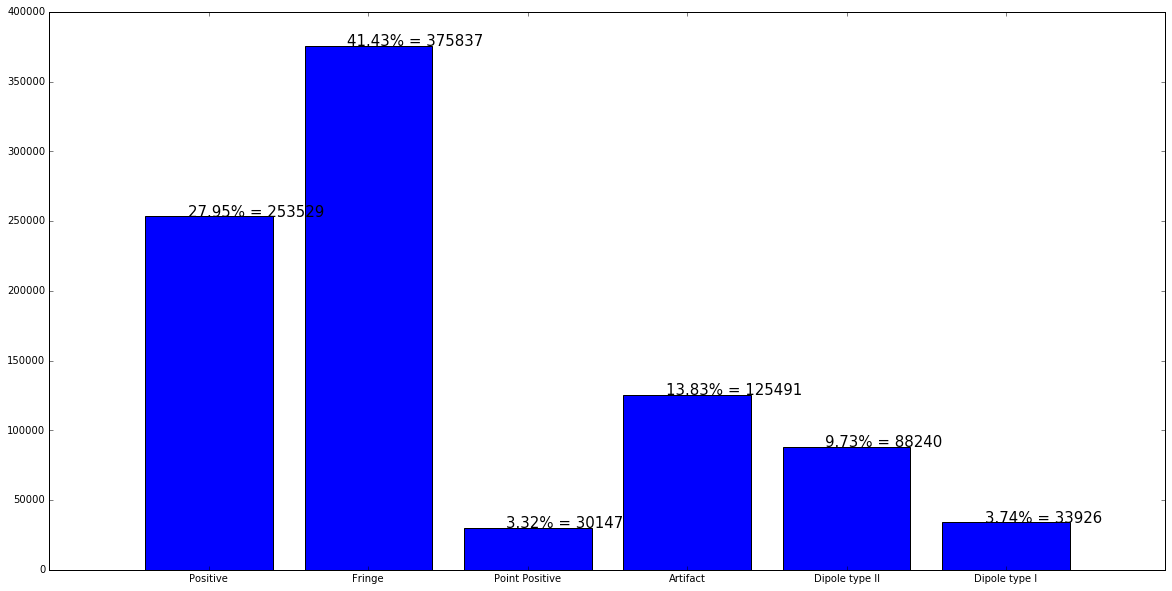

In [119]:
%matplotlib inline

classification_dict = {0:"Dipole type I", 1: "Dipole type II", 3:"Fringe", 4: "Artifact", 5:"Negative", 6:"Positive", 7:"Point Positive"}
SP.plot_object_distribution(lcs, classification_dict)

In [120]:
freq_dic=SP.get_frequency_dictionary(lcs, classification_dict)
perc_dic=SP.get_frequency_dictionary(lcs, classification_dict, percentual=True)

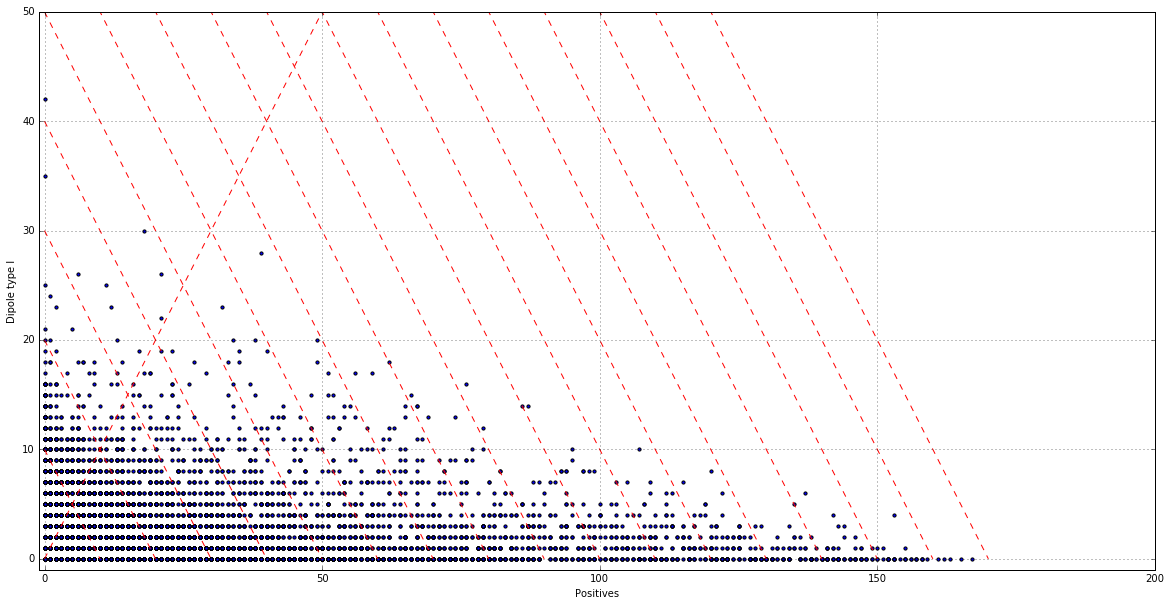

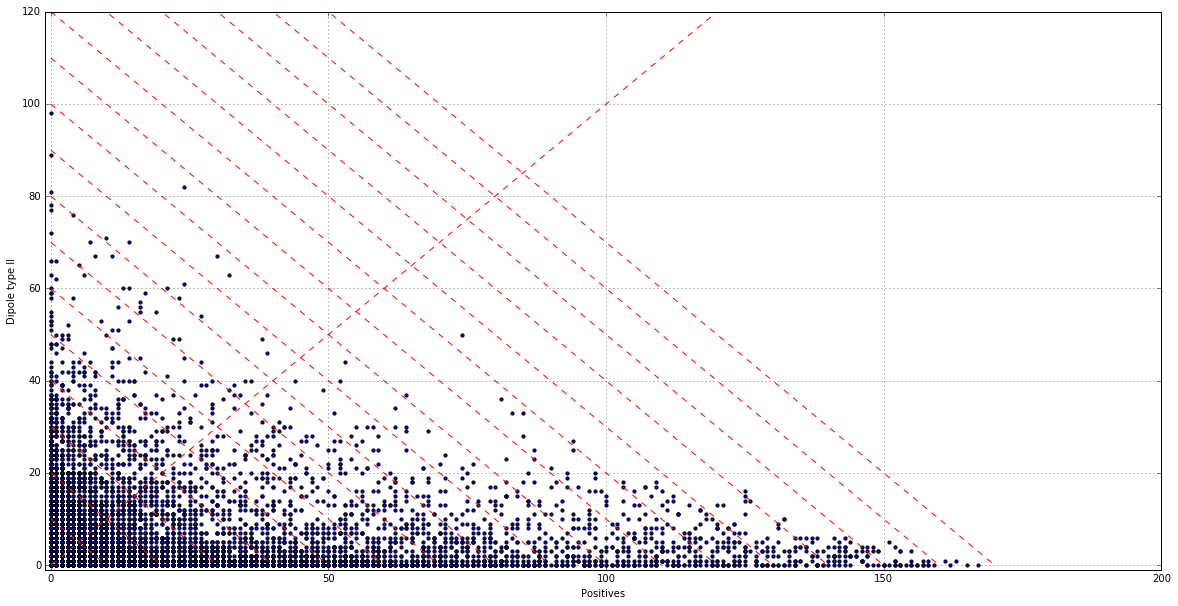

In [121]:
SP.plot_proportion(freq_dic[6], freq_dic[0], "Positives", "Dipole type I")
SP.plot_proportion(freq_dic[6], freq_dic[1], "Positives", "Dipole type II")

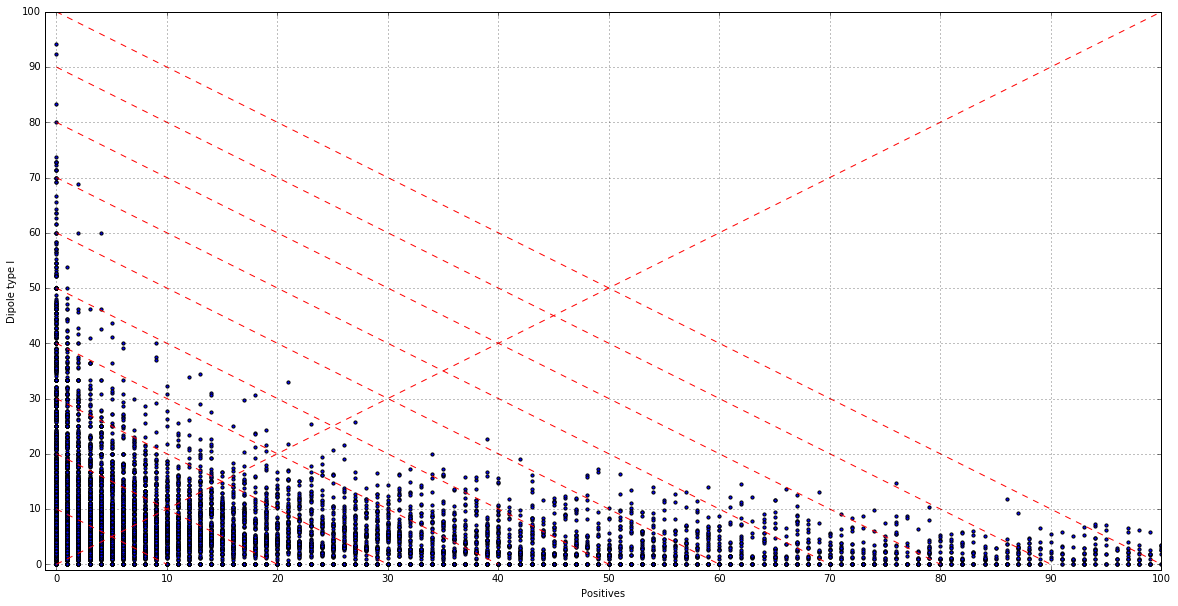

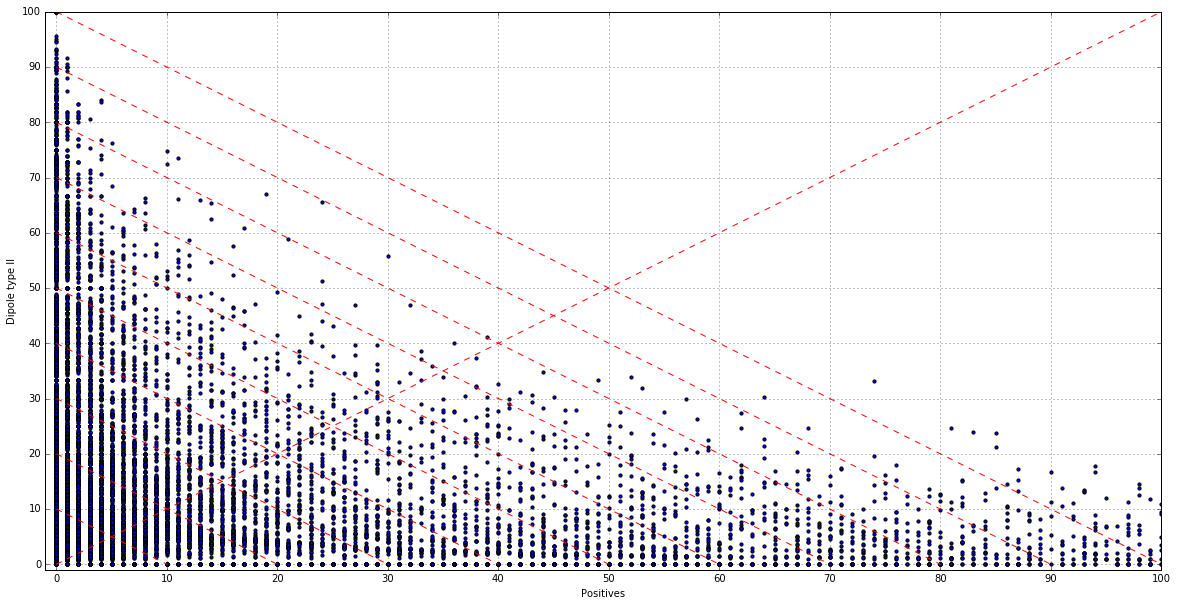

In [122]:
SP.plot_proportion(freq_dic[6], perc_dic[0], "Positives", "Dipole type I", percentual=True)
SP.plot_proportion(freq_dic[6], perc_dic[1], "Positives", "Dipole type II", percentual=True)

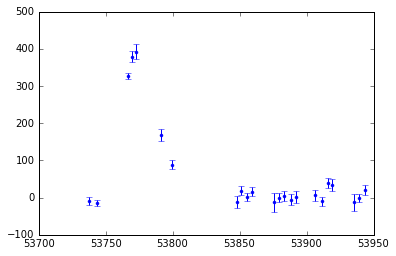

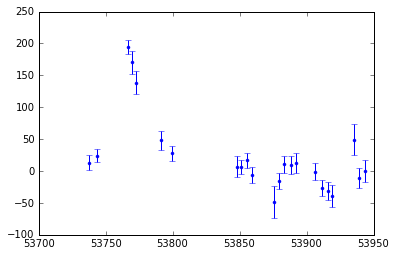

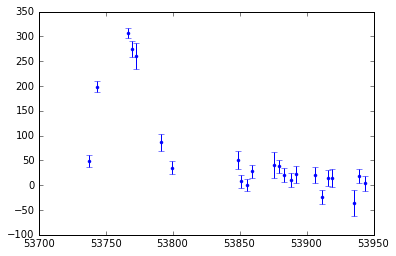

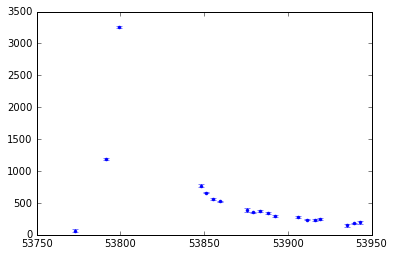

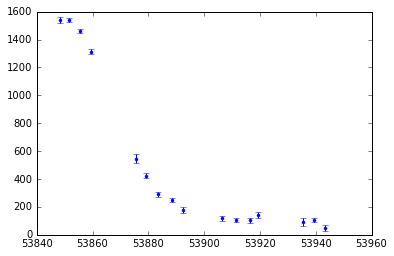

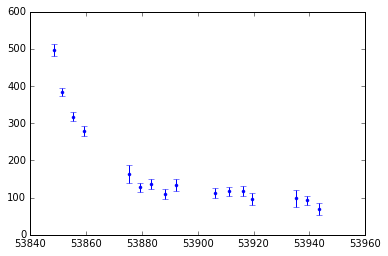

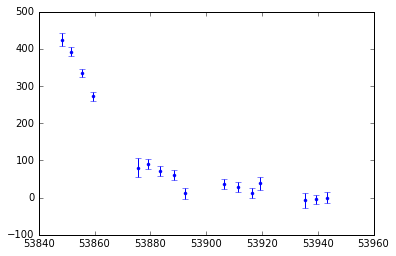

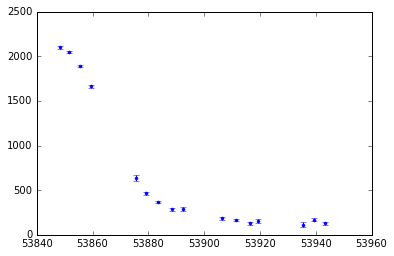

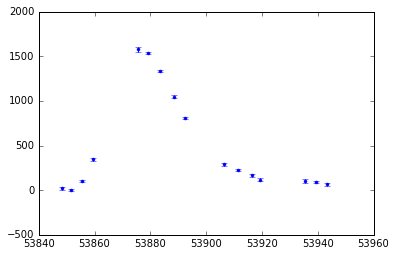

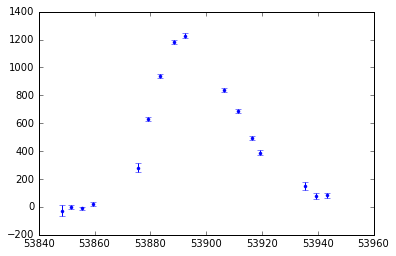

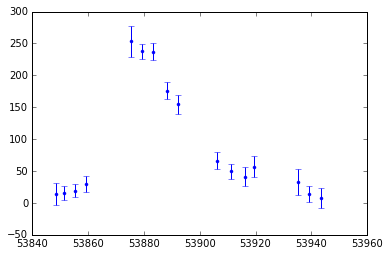

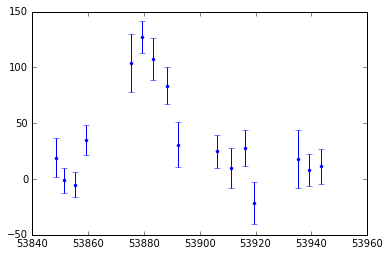

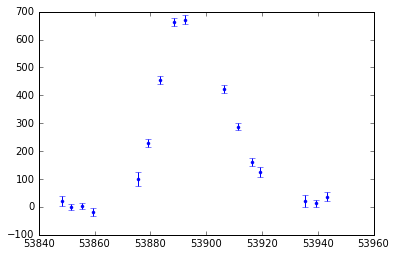

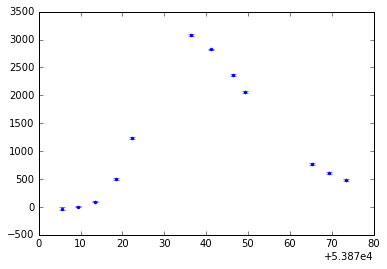

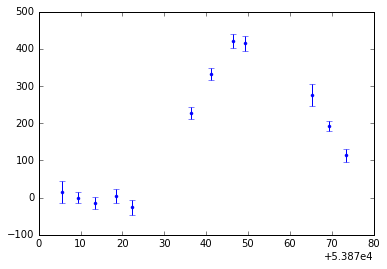

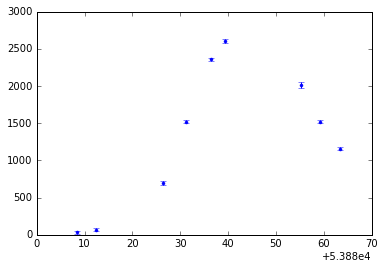

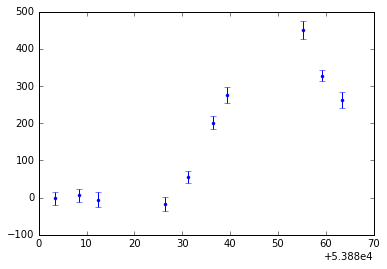

In [87]:
import re
import astropy.coordinates as coord
import astropy.units as u

f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table9.dat.txt','r')
data_elems = f.read()
elems = re.findall('^(06D3.*?)\\|(.*?)\\|', data_elems, re.MULTILINE)

f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table10.dat.txt','r')
data = f.read()

snls_array = []
for sn in elems:
    c = coord.SkyCoord(sn[-1], unit=(u.hourangle, u.deg))
    
    m = re.findall('^'+str(sn[0])+'\\|('+filter+')\\|(.*?)\\|(.*?)\\|(.*?)$', data, re.MULTILINE)

    snls_lc = DSTools.build_light_curve_from_snls_file(m, c)
    plt.errorbar(snls_lc['mjd'], snls_lc['flux'], yerr=snls_lc['flux_error'], fmt='.', color='blue')
    snls_array.append(snls_lc)
    plt.show()

In [123]:
matches = DSTools.match_control_group(lcs,snls_array)

In [124]:
float(len(matches))/float(len(snls_array))

0.4117647058823529

In [125]:
import pickle
output = open('lcs_i.pickle', 'wb')

# Pickle dictionary using protocol 0.
pickle.dump(lcs, output)
output.close()